
# Tutorial rápido de Python para Matemáticos

&copy; Ricardo Miranda Martins, 2022 - http://www.ime.unicamp.br/~rmiranda/

## Índice

1. [Introdução](1-intro.html) 
2. [Python é uma boa calculadora!](2-calculadora.html) [(código fonte)](2-calculadora.ipynb)
3. [Resolvendo equações](3-resolvendo-eqs.html)  [(código fonte)](3-resolvendo-eqs.ipynb)
4. [Gráficos](4-graficos.html)  [(código fonte)](4-graficos.ipynb)
5. [Sistemas lineares e matrizes](5-lineares-e-matrizes.html)  [(código fonte)](5-lineares-e-matrizes.ipynb)
6. [Limites, derivadas e integrais](6-limites-derivadas-integrais.html)  [(código fonte)](6-limites-derivadas-integrais.ipynb)
7. [Equações direrenciais](7-equacoes-diferenciais.html)  [(código fonte)](7-equacoes-diferenciais.ipynb)



# Resolvendo sistemas lineares

Resolver sistemas lineares é o ganha pão de matemáticos. Aliás, você sabe por quê dedicamos tanto tempo ensinando alunos a resolverem sistemas lineares? Simples: é que não sabemos direito resolver os não-lineares.

Existem basicamente duas formas do Python resolver sistemas lineares: pelo comando tradicional ```solve``` do SymPy ou pelo comando específico para sistemas lineares, o ```linsolve```. Essa segunda forma é mais rápida se o sistema for muito grande. No entanto, como você já deve imaginar, resolver sistemas lineares usando o NumPy é ainda mais rápido do que usando o SymPy.

Para sistemas muito grandes (muito mais que 1000 equações/variáveis), existem outros pacotes mais eficientes - se for seu caso, imagino que você não esteja aprendendo Python aqui nesse tutorial.

A rotina abaixo resolve o sistema

$$\left\{\begin{array}{lcl}
x+y-2z&=&1,\\
x+y-z&=&3,\\
3x+y-z&=&3
\end{array}\right.$$
usando o ```linsolve``` do SymPy.

In [40]:
import sympy as sp
x, y, z = sp.symbols('x y z')

eq1=sp.Eq(x+y-2*z,1)
eq2=sp.Eq(x+y-z,3)
eq3=sp.Eq(3*x+y-z,3)

sp.linsolve((eq1,eq2,eq3),(x,y,z))

{(0, 5, 2)}

Se quisermos a solução num outro formato, podemos usar o ```solve```:

In [41]:
sp.solve((eq1,eq2,eq3),(x,y,z))

{x: 0, y: 5, z: 2}

## Um exercício legal para testar nossos conhecimentos



Sejam $P=(\alpha_1,\beta_1,\gamma_1)$, $Q=(\alpha_2,\beta_2,\gamma_2)$ e $R=(\alpha_3,\beta_3,\gamma_3)$ pontos não-colineares em $\mathbb R^3.$ Encontre a equação do plano $\pi$, da forma $ax+by+cz=d$, que contém estes três pontos.

Primeiro vamos a uma solução "algébrica", levando em conta a equação do plano. Vamos usar os valores $P=(0,0,1)$, $Q=(3,1,0)$ e $R=(0,2,2)$ no exemplo abaixo.

In [42]:
import sympy as sp

# define as variaveis e constantes que vamos usar
x, y, z = sp.symbols('x y z')
a, b, c, d = sp.symbols('a b c d')

# equacao do plano na forma geral
eq = sp.Eq(a*x+b*y+c*z,d)

# definindo os pontos
P=sp.Array([0,0,1])
Q=sp.Array([3,1,0])
R=sp.Array([0,2,2])

# substituindo x,y,z na equacao do plano pelos pontos
eq1=eq.subs([(x,P[0]),(y,P[1]),(z,P[2])])
eq2=eq.subs([(x,Q[0]),(y,Q[1]),(z,Q[2])])
eq3=eq.subs([(x,R[0]),(y,R[1]),(z,R[2])])

# as equacoes acima resultam num sistema nas variaveis a, b, c, d.
# resolvendo o sistema:
sol=sp.linsolve((eq1,eq2,eq3),(a,b,c,d))

#armazenando as solucoes
(A,B,C,D)=tuple(*sol)

# finalmente, exibindo a equação do plano, substituindo a,b,c,d pelos
# valores que encontramos
eq.subs([(a,A),(b,B),(c,C),(d,D)])


Eq(d*x/2 - d*y/2 + d*z, d)

A solução acima fica na dependência de uma constante, no caso $d$. Pode-se substituir qualquer valor para $d$.

Agora vamos a uma solução um pouco mais geométrica. Vamos obter o vetor normal do plano como sendo o produto vetorial $n=u\times v$, onde $u=PQ$ e $v=PR$. A seguir, obtemos a equação do plano utilizando um dos pontos por onde ele passa. A solução é mais longa, porém é bem mais elegante e evita o aparecimento de constantes indesejadas.

In [43]:
# importando a biblioteca para calculos simbolicos
import sympy as sp

# vamos usar a biblioteca NumPy para calcular o produto vetorial e tambem
# o produto interno
import numpy as np

# define as variaveis e constantes que vamos usar
x, y, z = sp.symbols('x y z')
a, b, c, d = sp.symbols('a b c d')

# equacao do plano na forma geral
eq = sp.Eq(a*x+b*y+c*z,d)

# definindo os pontos
P=sp.Array([0,0,1])
Q=sp.Array([3,1,0])
R=sp.Array([0,2,2])

# criando os vetores
u=Q-P
v=R-P

# obtendo o vetor normal
n=np.cross(u,v)
(a,b,c)=n

# termo nao-homogeneo
d=np.dot(n,P)

# exibindo a equação do plano
sp.Eq(a*x+b*y+c*z,d)

Eq(3*x - 3*y + 6*z, 6)

# Matrizes

Claro que poderíamos ter mesclado os capítulos sobre matrizes e sistemas lineares. Só deixamos separado para poder explorar um pouco melhor as propriedades desses retângulos cheios de números que nós adoramos.

Aliás, você sabe de onde vem a regra estranha de multiplicar matrizes? Vem da composição de operadores lineares. O Python trabalha com matrizes muito bem. Só devemos ter um pouco de cuidado com a notação.

Vamos fixar a notação e trabalhar abaixo com as matrizes $$A=\begin{pmatrix}1&2\\ -3&1\end{pmatrix},$$ $$B=\begin{pmatrix}2\\ 4\end{pmatrix}$$ e
$$C=\begin{pmatrix}2&5\\1&1\end{pmatrix}$$ 
em nossos exemplos.

In [44]:
import sympy as sp

A=sp.Matrix([[1,2],[-3,1]])
B=sp.Matrix([[2],[4]])
C=sp.Matrix([[2,5],[4,10]])

In [45]:
A

Matrix([
[ 1, 2],
[-3, 1]])

In [46]:
B

Matrix([
[2],
[4]])

In [47]:
C

Matrix([
[2,  5],
[4, 10]])

Algumas matrizes especiais podem ser criadas de modo mais simples. Por exemplo, a identidade $n\times n$ pode ser criada com o comando ```eye(n)```.

In [48]:
sp.eye(2)

Matrix([
[1, 0],
[0, 1]])

Já a matriz nula $m\times n$ pode ser criada com o comando ```zeros(m,n)```:

In [49]:
sp.zeros(2,2)

Matrix([
[0, 0],
[0, 0]])

Podemos também criar de modo muito fácil uma matriz $m\times n$ só com 1's com o comando ```ones(m,n)```:

In [50]:
sp.ones(2,2)

Matrix([
[1, 1],
[1, 1]])

O produto de matrizes é feito com o mesmo símbolo usual: para obter o produto de A por B, o comando é ```A*B```:

In [51]:
A*C

Matrix([
[10, 25],
[-2, -5]])

In [52]:
A*B

Matrix([
[10],
[-2]])

Lembre-se que nem sempre dá para multiplicar duas matrizes - só podemos multiplicar uma matriz $m\times n$ por uma $n\times r$. Se tentarmos com matrizes de dimensões "estranhas", vai dar erro:

In [53]:
B*A

ShapeError: Matrix size mismatch: (2, 1) * (2, 2).

Lembre-se também que o produto de matrizes não é comutativo, ou seja, $A\cdot C$ pode ser diferente de $C\cdot A$, ou seja, $AC-CA$ pode ser diferente de zero:

In [54]:
A*C-C*A

Matrix([
[23,  16],
[24, -23]])

Se $A$ é uma matriz quadrada, dizemos que ela é invertível se existe outra matriz $D$ tal que $AD=DA=I_{2\times 2}$. Essa matriz $D$ é chamada de matriz inversa de $A$ e denotada por $D=A^{-1}$. Nem toda matriz admite inversa, mas quando a inversa existe ela pode ser calculada no Python com o comando ```A**(-1)```:

In [55]:
A**(-1)

Matrix([
[1/7, -2/7],
[3/7,  1/7]])

Uma propriedade das matrizes que tem inversa é que ela tem o determinante diferente de zero. O determinante é uma "propriedade" da matriz, então podemos "resgatar" o determinante de $A$ com o sufixo ```A.det()```:

In [56]:
A.det()

7

A mesma lógica é seguida se quisermos os autovalores ou autovetores da matriz:

In [57]:
A.eigenvals()

{1 - sqrt(6)*I: 1, 1 + sqrt(6)*I: 1}

In [58]:
A.eigenvects()

[(1 - sqrt(6)*I,
  1,
  [Matrix([
   [sqrt(6)*I/3],
   [          1]])]),
 (1 + sqrt(6)*I,
  1,
  [Matrix([
   [-sqrt(6)*I/3],
   [           1]])])]

Se você achou a saída do comando acima um pouco feia, talvez prefira usar o ```pprint``` (pretty print):

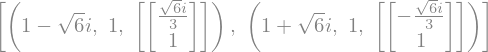

In [59]:
sp.init_printing(use_unicode=True)
A.eigenvects()

Agora sim, dá pra entender né? A saída é composta pelo autovalor, sua multiplicidade, e o(s) autovetor(es) associado(s). Vamos fazer um exemplo $3\times 3$ que tem um autovalor de multiplicidade 2 para ilustrar melhor isso:

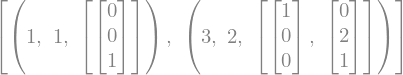

In [60]:
M=sp.Matrix([[3,0,0],[0,3,0],[0,1,1]])
M.eigenvects()

Determinar a solução do sistema linear $AX=0$ é o mesmo que calcular o "núcleo" da matriz $A$. Isso pode ser feito com o sufixo ```nullspace()```. Vamos fazer isso para as matrizes $A$ e $C$ para comparar os resultados:

In [61]:
A.nullspace()

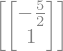

In [62]:
C.nullspace()

Note que o resultado acima nos permite concluir que a matriz $C$ tem um autovalor nulo, e o autovetor associado é justamente a resposta anterior, que é o gerador do núcleo de $C$. Quer conferir? Então toma:

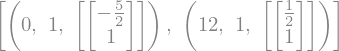

In [63]:
C.eigenvects()

Também podemos obter os vetores que são geradores da imagem de $A$, ou seja, se considerarmos o operador $T_A:\mathbb R^2\rightarrow\mathbb R^2$, $T_A(v)\mapsto Av$, então o sufixo ```columnspace()``` nos dará os vetores que são geradores da imagem desse operador:

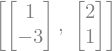

In [64]:
A.columnspace()

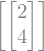

In [65]:
C.columnspace()

Uma coisa que sempre fazemos com matrizes é calcular a sua forma de Jordan, ou, quando possível, diagonalizá-la. Isso pode ser feito com o comando ```diagonalize()```:

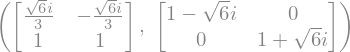

In [66]:
A.diagonalize()

Esse comando retorna duas matrizes: a primeira delas é a matriz mudança de base; a segunda é a forma diagonal da matriz. Se quisermos usar notações para essas matrizes, vamos denotar por $Q$ a matriz mudança de base e $D$ a matriz diagonal:

In [67]:
Q,D = A.diagonalize()

Da teoria, sabemos que $Q\cdot D\cdot Q^{-1}=A$. Em geral, isso só dá certo de usarmos o ```simplify``` no produto matricial do lado esquerdo:

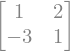

In [68]:
sp.simplify(Q*D*(Q**(-1)))

## Um exercício interessante: reconhecimento de cônicas

Considere uma equação quadrática da forma $$ax^2+bxy+cy^2+dx+ey+f=0.$$

Você já deve saber que a representação dos pontos $(x,y)$ que satisfaem essa equação tem uma classificação bem detalhada: basicamente, com exceção de alguns casos degenerados, teremos ou uma elipse ou uma hipérbole ou uma parábola. São as famosas "cônicas", curvas que são obtidas na interseção de um plano com um cone duplo.

O procedimento mais comum usado para decidir qual dos casos temos, e para escrever uma equação mais "simpática" para essa cônica é usar autovalores e autovetores. Vamos fazer isso no exemplo abaixo.

Você pode trocar a equação que deve continuar funcionando (cuidado com algumas mudanças de coordenadas e com divisões por zero que podem aparecer no processo ao alterar os coeficientes).

A ideia do "reconhecimento de cônicas" é razoavelmente simples, mas os cálculos são bem chatos de fazer na mão.

A equação $$ax^2+bxy+cy^2+dx+ey+f=0$$ pode ser reescrita em forma matricial como
$$\begin{pmatrix}x&y
\end{pmatrix}\begin{pmatrix}a&b/2\\ b/2&c\end{pmatrix}\begin{pmatrix}x\\y
\end{pmatrix} +\begin{pmatrix}d&e
\end{pmatrix}\begin{pmatrix}x\\y
\end{pmatrix}+\begin{pmatrix}f\end{pmatrix}=0.$$

Como a matriz $\begin{pmatrix}f\end{pmatrix}$ é $1\times 1$, em geral não iremos usar a notação matricial e escrever somente $f$:

$$\begin{pmatrix}x&y
\end{pmatrix}\begin{pmatrix}a&b/2\\ b/2&c\end{pmatrix}\begin{pmatrix}x\\y
\end{pmatrix} +\begin{pmatrix}d&e
\end{pmatrix}\begin{pmatrix}x\\y
\end{pmatrix}+f=0.$$

Denote por $$A=\begin{pmatrix}a&b/2\\ b/2&c\end{pmatrix}.$$ Essa matriz satisfaz $A=A^t$, então pelo Teorema Espectral provado por Cauchy em 1829, existem matrizes $Q$ e $D$, sendo $D$ uma matriz diagonal, de modo que $$QD Q^{-1}=A,$$ o que é equivalente a $$D=Q^{-1}AQ.$$

Podemos construir as matrizes $Q$ e $D$ assim: a matriz $D$ é a matriz diagonal com os autovalores de $A$ e a matriz $Q$ é uma matriz cujas colunas são autovetores normais (de norma 1) de $A$, satifazendo $Q^t=Q^{-1}$. Após calculá-las, realizamos a mudança de coordenadas

$$\begin{pmatrix}x\\y\end{pmatrix}=Q\begin{pmatrix}u\\v\end{pmatrix}.$$

Substituindo na equação da cônica, temos
$$\left(Q\begin{pmatrix}u\\v\end{pmatrix}\right)^t \begin{pmatrix}a&b/2\\ b/2&c\end{pmatrix}Q\begin{pmatrix}u\\v\end{pmatrix} +\begin{pmatrix}d&e
\end{pmatrix}Q\begin{pmatrix}u\\v\end{pmatrix}+f=0,$$
ou seja,
$$\begin{pmatrix}u&v
\end{pmatrix}Q^t AQ\begin{pmatrix}u\\v\end{pmatrix} +\begin{pmatrix}d&e
\end{pmatrix}Q\begin{pmatrix}u\\v\end{pmatrix}+f=0.$$

Usando que $Q^tAQ=D$ a equação acima fica
$$\begin{pmatrix}u&v
\end{pmatrix}D\begin{pmatrix}u\\v\end{pmatrix} +\begin{pmatrix}d&e
\end{pmatrix}Q\begin{pmatrix}u\\v\end{pmatrix}+f=0.$$

Se $$D=\begin{pmatrix}\lambda&0\\0&\mu\end{pmatrix},$$ onde $\lambda,\mu$ são os autovalores de $A$, então escrevendo novamente a equação da cônica temos
$$\lambda u^2+\mu v^2+\alpha u+\beta v+f=0,$$ para alguns valores de $\alpha,\beta$. O próximo passo é completar quadrados para deixar a equação mais simples. Aqui é preciso tomar cuidado, e a teoria não pode ser tão geral, pois algumas condições degeneradas podem ocorrer ($\lambda$ ou $\mu$ serem zero, por exemplo). Vamos supor que $\lambda\neq 0$, $\mu\neq 0$ e seguir com as contas.

Reescrevemos a equação anterior como
$$\lambda\left( u^2+\dfrac{\alpha u}{\lambda}\right)+\mu \left(v^2+\dfrac{\beta v}{\mu}\right)+f=0.$$

Completando quadrados, temos
$$\lambda\left( u^2+\dfrac{\alpha u}{\lambda}\right)+\mu \left(v^2+\dfrac{\beta v}{\mu}\right)+f=0$$
e daí 
$$\lambda\left( u^2+\dfrac{\alpha u}{\lambda}+ \dfrac{\alpha^2}{4\lambda^2} \right)+\mu \left(v^2+\dfrac{\beta v}{\mu}+\dfrac{\beta^2}{4\mu^2}\right)+f-\dfrac{\alpha^2}{4\lambda}-\dfrac{\beta^2}{4\mu}=0.$$

Agrupando tudo, ficamos com a equação
$$\lambda\left( u+\dfrac{\alpha}{2\lambda} \right)^2+\mu \left(v+\dfrac{\beta}{2\mu}\right)^2+\tilde f=0,$$ onde $\tilde f=f-\dfrac{\alpha^2}{4\lambda}-\dfrac{\beta^2}{4\mu}$.

Fazendo uma nova mudança de coordenadas para $w=u+\dfrac{\alpha}{2\lambda}$, $z=v+\dfrac{\beta}{2\mu}$ ficamos com a equacão $$\lambda w^2+\mu z^2+\tilde f=0.$$

Conhecendo os valores de $\lambda,\mu,\tilde f$ poderemos reconhecer a cônica! Vamos agora fazer os cálculos de tudo isso no Python, e depois fazer alguns gráficos.

In [69]:
a=1
b=2
c=-3
d=1
e=2
f=-4
x, y = sp.symbols('x y')
sp.Eq(a*x**2+b*x*y+c*y**2+d*x+e*y+f,0)

Vantagens do computador: vamos usar o Python pra pegar uma dica do que esperar lá no fim, plotando os pontos que satisfazem essa equação. O código abaixo é uma versão simplificada do nosso código para plotar curvas de nível (no caso, a curva de nível 0).

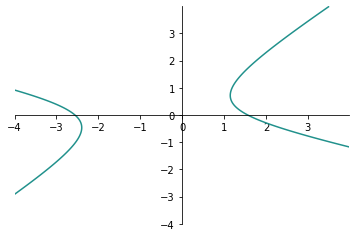

In [70]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
delta = 0.01
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-4.0, 4.0, delta)
x, y = np.meshgrid(x, y)
z = a*x**2+b*x*y+c*y**2+d*x+e*y+f

fig = plt.figure()
ax = fig.add_subplot()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.contour(x, y, z,0)

Humm.. me parece que teremos uma hipérbole. Isso significa que podemos esperar um autovalor positivo e um negativo. Vamos começar as contas definindo a matriz A.

Aqui vamos usar um truque: queremos levar todos esses cálculos de forma algébrica, sem aproximações numéricas. Só que na definição da matriz $A$, temos um $b/2$: se digitarmos somente $b/2$, o resultado vai ser em ponto flutuante. Então vamos forçar o SymPy a usar o $b/2$ como sendo um número racional, com o comando ```Rational(b,2)```.

In [71]:
A=sp.Matrix([[a,sp.Rational(b, 2)],[sp.Rational(b, 2),c]])

Agora vamos pedir ao Python para diagonalizar a matriz $A$, salvar a matriz diagonal como $D$ e a matriz mudança de base como $Q$:

In [72]:
Q,D = A.diagonalize()

Conferindo como estão as matrizes:

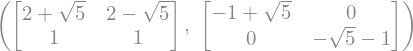

In [73]:
Q,D

Para que a nossa estratégia de mudança de base para reconhecimento de cônica funcione, precisamos pegar a matriz de mudança de base como sendo uma matriz cujas colunas formam uma base ortonormal de $\mathbb R^2$. No momento temos somente uma base. Vamos então escolher outra matriz $Q$ normalizando as colunas da matriz atual. Isso pode ser feito com o comando abaixo:

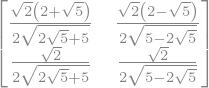

In [74]:
n1=sp.simplify(sp.sqrt(Q[0]**2+Q[2]**2))
n2=sp.simplify(sp.sqrt(Q[1]**2+Q[3]**2))
Q2=sp.simplify(sp.Matrix([[Q[0]/n1,Q[1]/n2],[Q[2]/n1,Q[3]/n2]]))
Q=Q2
Q

Note que agora a matriz $Q$ satisfaz o que queríamos: $Q^t=Q^{-1}$..

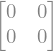

In [75]:
sp.simplify(Q**(-1)-Q.transpose())

... e ainda vale $Q^{-1}AQ=D$:

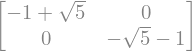

In [76]:
sp.simplify(Q**(-1)*A*Q)

Vamos agora ver como ficou a cônica após a primeira mudança de coordenada que fizemos:

In [77]:
# aplicando a mudança de coordenadas; z2 será a nova equacao

x, y = sp.symbols('x y')
z2=sp.simplify(
    (sp.Matrix([[x,y]])*(Q**(-1)*A*Q)*sp.Matrix([[x],[y]]))+(sp.Matrix([[d,e]]))*Q*(sp.Matrix([[x],[y]]))+sp.Matrix([[f]])
)[0]

In [78]:
sp.init_printing(use_unicode=False)

In [79]:
# exibindo a nova equacao, e como vamos usá-la para plotar, passando tudo
# pra ponto flutuante. você vai precisar copiar o resultado desse comando e
# colar na próxima linha de código, no z = ....
z3=z2.evalf()
repr(z3)

'1.23606797749979*x**2 + 1.43275483056186*x - 3.23606797749979*y**2 + 1.71674505838791*y - 4.0'

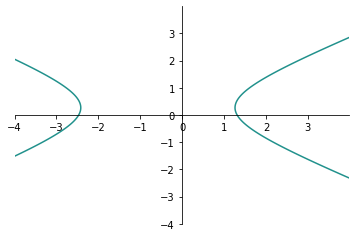

In [80]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
delta = 0.01
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-4.0, 4.0, delta)
x, y = np.meshgrid(x, y)
z3 = 1.23606797749979*x**2 + 1.43275483056186*x - 3.23606797749979*y**2 + 1.71674505838791*y - 4.0

fig = plt.figure()
ax = fig.add_subplot()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.contour(x, y, z3,0)

Olha só, já conseguimos desentortar a hipérbole!! Agora só precisamos da segunda mudança de coordenadas para poder centralizá-la. Vamos precisar calcular $\alpha$, $\beta$ e os autovalores $\lambda$ e $\mu$.

In [81]:
lam = D[0]
mu = D[3]

Note que $\alpha$ é como chamamos o coeficiente de $x$ na expressão pós-primeira mudança de coordenadas. Essa expressão pra gente está guardada na variável ```z2```. Como vamos recuperá-la? Bom, uma possibilidade é derivar essa expressão em $x$ e depois fazer todas as outras variáveis iguais a zero (pense um pouco nessa estratégia).

In [82]:
x, y = sp.symbols('x y')
termolinear=sp.simplify((sp.Matrix([[d,e]]))*Q*(sp.Matrix([[x],[y]])))[0]
alfa=sp.diff(termolinear,x)
beta=sp.diff(termolinear,y)

Agora já podemos plotar o gráfico final:

1.23606797749979*x**2 - 3.23606797749979*y**2 - 4.1875


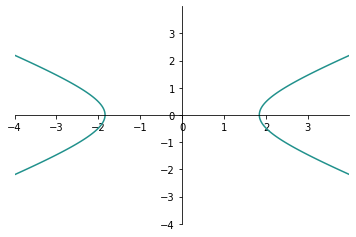

In [83]:
# definindo quem é f-til
ftil=f-(alfa**2)/(4*lam)-beta**2/(4*mu)

# resetando as variáveis e escrevendo a equacao final
x, y = sp.symbols('x y')
print((lam*x**2 + mu*y**2 +ftil).evalf())

# plotando
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
delta = 0.01
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-4.0, 4.0, delta)
x, y = np.meshgrid(x, y)
z4 = 1.23606797749979*x**2 - 3.23606797749979*y**2 - 4.1875

fig = plt.figure()
ax = fig.add_subplot()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.contour(x, y, z4,0)

Por fim, vamos plotar todas as curvas num único sistema de eixos, para você ver o que aconteceu. A curva em vermelho é a original, a curva em azul é após a mudança de coordenadas do tipo rotação, e a curva preta é após a segunda mudança de coordenadas, de translação.

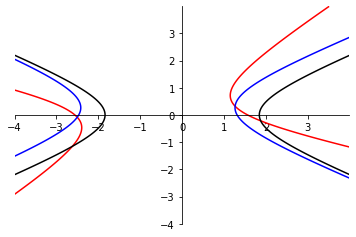

In [84]:
# plotando
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
delta = 0.01
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-4.0, 4.0, delta)
x, y = np.meshgrid(x, y)

z = a*x**2+b*x*y+c*y**2+d*x+e*y+f
z3 = 1.23606797749979*x**2 + 1.43275483056186*x - 3.23606797749979*y**2 + 1.71674505838791*y - 4.0
z4 = 1.23606797749979*x**2 - 3.23606797749979*y**2 - 4.1875

fig = plt.figure()
ax = fig.add_subplot()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.contour(x, y, z,0,colors=['red'])
plt.contour(x, y, z3,0,colors=['blue'])
plt.contour(x, y, z4,0,colors=['black'])
plt.show()

E a equação final é:

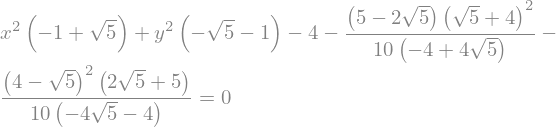

In [85]:
x, y = sp.symbols('x y')
sp.Eq(lam*x**2+mu*y**2+ftil,0)